In [66]:
import pandas as pd
import ast

df = pd.read_csv("../data/processed/movie_stats/movie_stats.csv", index_col=0)

df["cast"] = df["cast"].map(ast.literal_eval)
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] =df["release_date"].dt.year
df["release_month"] =df["release_date"].dt.month
df["release_day"] =df["release_date"].dt.day

df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,release_year,release_month,release_day
0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133,2023,11,8
1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,2023,5,3
2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,2021,12,15
3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,2018,4,25
4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,2023,2,15


In [67]:
df.describe()

,release_date,movie_budget,movie_revenue,release_year,release_month,release_day
count,33,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000
mean,2017-05-08 19:38:10.909090816,2.022061e+08,8.983435e+08,2016.878788,6.212121,15.787879
min,2008-04-30 00:00:00,1.300000e+08,1.089981e+08,2008.000000,2.000000,1.000000
25%,2014-03-20 00:00:00,1.600000e+08,5.193120e+08,2014.000000,4.000000,6.000000
50%,2017-10-02 00:00:00,2.000000e+08,7.727766e+08,2017.000000,6.000000,15.000000
75%,2021-09-01 00:00:00,2.200000e+08,1.131928e+09,2021.000000,7.000000,25.000000
max,2023-11-08 00:00:00,3.650000e+08,2.800000e+09,2023.000000,12.000000,30.000000
std,NaN,5.826246e+07,5.661510e+08,4.435352,2.880512,9.717116


In [68]:
movie_counts = df["release_year"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_year

,movie_budget,movie_revenue
release_year,,
2008,290000000,748886296
2010,200000000,623933331
2011,290000000,819896392
2012,220000000,1518815515
2013,370000000,1860360345
2014,340000000,1487543172
2015,495000000,1924715659
2016,430000000,1831389590
2017,555000000,2599224781


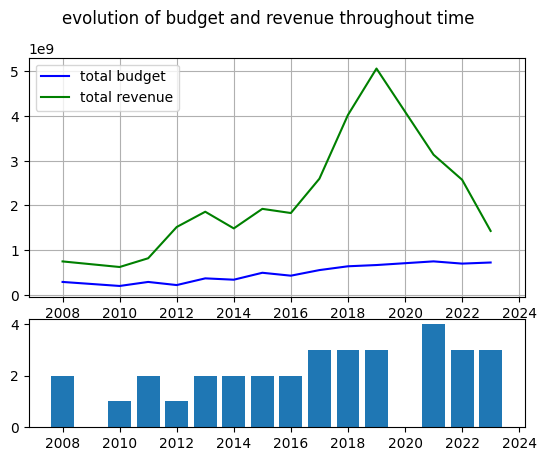

In [69]:
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1,2)
# remove the underlying axes
# for ax in axs[:2]:
#     ax.remove()
# axbig = fig.add_subplot(gs[1:, :2])


fig = plt.figure()

gs = fig.add_gridspec(3,1)
ax1 = fig.add_subplot(gs[:2])
ax1.grid()
ax2 = fig.add_subplot(gs[2], sharex=ax1)


ax1.plot(df_year.index, df_year["movie_budget"], color="blue", label="total budget")
# frame1.axes.get_xaxis().set_visible(False)
ax1.plot(df_year.index, df_year["movie_revenue"], color="green", label="total revenue")
ax1.legend()
ax2.bar(movie_counts.index, movie_counts)
fig.suptitle("evolution of budget and revenue throughout time")

plt.show()

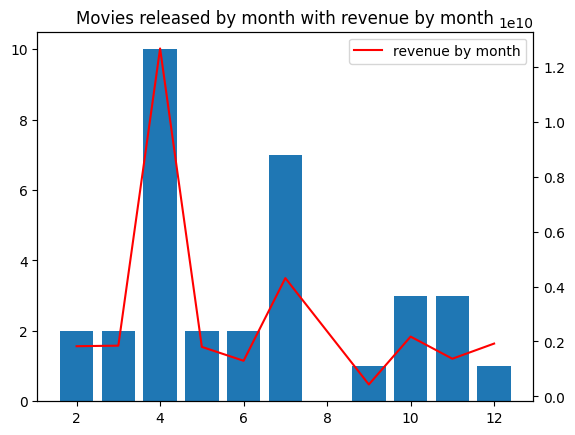

In [81]:
month_counts = df["release_month"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_month = df.groupby("release_month")[["movie_budget", "movie_revenue"]].sum()

plt.bar(month_counts.index, month_counts)
axes2 = plt.twinx()
axes2.plot(df_month["movie_revenue"], color='red', label="revenue by month")

plt.title("Movies released by month with revenue by month")
plt.legend()
plt.show()